Implement a KNN model to classify the animals in to categorie

In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df1=df.drop(['animal name'],axis=1)
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df1['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [20]:
X=df1.iloc[:,0:-1]
Y=df1.iloc[:,-1]
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [6]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=19)

In [8]:
import warnings
warnings.filterwarnings('ignore')
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           6       0.33      1.00      0.50         1
           7       1.00      0.67      0.80         6

    accuracy                           0.87        31
   macro avg       0.84      0.86      0.80        31
weighted avg       0.92      0.87      0.87        31



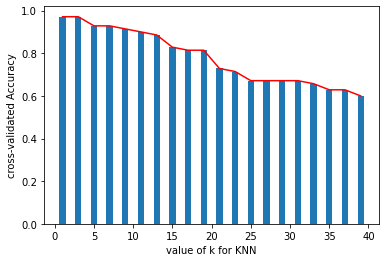

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range=[2*i+1 for i in range(0,20)]
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10)
    k_scores.append(scores.mean())    
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color='red')
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.show()


In [13]:
np.argmax(k_scores)

0

In [14]:
k_range[0]

1

In [15]:
k_scores[0]

0.9714285714285715

In [37]:
import warnings
warnings.filterwarnings('ignore')
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78        23
           2       0.64      0.67      0.65        21
           3       0.33      0.50      0.40         2
           5       0.40      1.00      0.57         2
           6       1.00      0.40      0.57         5
           7       1.00      0.83      0.91        12

    accuracy                           0.72        65
   macro avg       0.69      0.70      0.65        65
weighted avg       0.77      0.72      0.73        65



Prepare a model for glass classification using KNN

In [16]:
glass=pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [19]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [30]:
X=glass.iloc[:,0:-1]
Y=glass.iloc[:,-1]
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [31]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=12)

In [38]:
import warnings
warnings.filterwarnings('ignore')
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.72      0.78      0.75        23
           2       0.67      0.67      0.67        21
           3       0.00      0.00      0.00         2
           5       0.25      0.50      0.33         2
           6       1.00      0.40      0.57         5
           7       0.77      0.83      0.80        12

    accuracy                           0.69        65
   macro avg       0.57      0.53      0.52        65
weighted avg       0.70      0.69      0.68        65



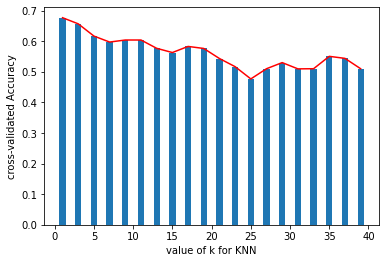

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range=[2*i+1 for i in range(0,20)]
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10)
    k_scores.append(scores.mean())    
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color='red')
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.show()


In [41]:
np.argmax(k_scores)

0

In [42]:
k_range[0]

1

In [43]:
k_scores[0]

0.6766666666666666

In [45]:
import warnings
warnings.filterwarnings('ignore')
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78        23
           2       0.64      0.67      0.65        21
           3       0.33      0.50      0.40         2
           5       0.40      1.00      0.57         2
           6       1.00      0.40      0.57         5
           7       1.00      0.83      0.91        12

    accuracy                           0.72        65
   macro avg       0.69      0.70      0.65        65
weighted avg       0.77      0.72      0.73        65

